
# Data Download & Verification

Installation et importation des bibliothèques

In [4]:

!pip install pandas geopandas rasterio matplotlib shapely fiona numpy


In [2]:


import importlib


libraries = [
    "pandas",
    "geopandas",
    "rasterio",
    "matplotlib",
    "shapely",
    "fiona",
    "numpy"
]

print("🔍 Vérification des bibliothèques Python nécessaires...\n")


for lib in libraries:
    try:
        importlib.import_module(lib)
        print(f" {lib} est installé et importable.")
    except ImportError:
        print(f" {lib} n'est pas installé ! --> Installez avec : pip install {lib}")

print("\n Vérification terminée.")


🔍 Vérification des bibliothèques Python nécessaires...

 pandas est installé et importable.
 geopandas est installé et importable.
 rasterio est installé et importable.
 matplotlib est installé et importable.
 shapely est installé et importable.
 fiona est installé et importable.
 numpy est installé et importable.

 Vérification terminée.


Import des bibliothèques et définition des chemins

In [3]:
import os
import pandas as pd
import geopandas as gpd
import rasterio

base_path = "../data"
raw = os.path.join(base_path, "raw")
abs_path = os.path.abspath(raw)

print("Chemin relatif :", raw)
print("Chemin absolu :", abs_path)


Chemin relatif : ../data\raw
Chemin absolu : C:\Users\DELL\Desktop\project_fire\data\raw


Vérifier les dossiers de données

In [4]:
subfolders = ["fire", "landcover", "climate", "elevation", "soil"]
for folder in subfolders:
    path = os.path.join(raw, folder)
    os.makedirs(path, exist_ok=True)
    print(f" {folder} - OK ({path})")


 fire - OK (../data\raw\fire)
 landcover - OK (../data\raw\landcover)
 climate - OK (../data\raw\climate)
 elevation - OK (../data\raw\elevation)
 soil - OK (../data\raw\soil)


Vérification du jeu de données Fire

In [5]:
fire_path = os.path.join(raw, "fire")
algeria_csv = os.path.join(fire_path, "viirs-jpss1_2024_Algeria.csv")
tunisia_csv = os.path.join(fire_path, "viirs-jpss1_2024_Tunisia.csv")

fire_dz = pd.read_csv(algeria_csv)
fire_tn = pd.read_csv(tunisia_csv)

print(" Algeria fires:", fire_dz.shape)
print(" Tunisia fires:", fire_tn.shape)


print("\n---  Algeria Data ---")
display(fire_dz.head())

print("\n---  Tunisia Data ---")
display(fire_tn.head())


 Algeria fires: (87446, 15)
 Tunisia fires: (2804, 15)

---  Algeria Data ---


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
0,27.72818,9.87200,295.51,0.76,0.77,2024-01-01,3,N20,VIIRS,n,2,277.66,1.24,N,2
1,28.63288,9.77909,301.80,0.79,0.78,2024-01-01,3,N20,VIIRS,n,2,277.05,1.57,N,2
2,28.64012,9.77953,298.65,0.79,0.78,2024-01-01,3,N20,VIIRS,n,2,277.04,1.34,N,2
3,36.74886,6.25409,338.04,0.46,0.39,2024-01-01,141,N20,VIIRS,n,2,257.28,5.21,N,2
4,35.87978,4.44782,309.49,0.41,0.37,2024-01-01,141,N20,VIIRS,n,2,272.08,1.58,N,2



---  Tunisia Data ---


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
0,31.64847,9.16945,315.79,0.53,0.50,2024-01-01,142,N20,VIIRS,n,2,279.09,2.20,N,2
1,31.49290,9.48947,302.32,0.56,0.51,2024-01-01,142,N20,VIIRS,n,2,276.10,1.23,N,0
2,31.49524,9.49053,301.88,0.56,0.51,2024-01-01,142,N20,VIIRS,n,2,276.12,0.77,N,0
3,33.36728,8.54768,302.58,0.45,0.47,2024-01-01,142,N20,VIIRS,n,2,277.15,0.80,N,2
4,31.64812,9.17107,320.80,0.46,0.39,2024-01-02,124,N20,VIIRS,n,2,278.37,2.44,N,2


In [6]:
import os


landcover_dir = os.path.join(raw, "landcover")


countries = ["Algeria", "Tunisia"]

for country in countries:
    path = os.path.join(landcover_dir, country)
    print(f"\n Contenu du dossier {country}:")
    for file in os.listdir(path):
        print("  -", file)



 Contenu du dossier Algeria:
  - dza_gc_adg.avl
  - dza_gc_adg.dbf
  - dza_gc_adg.lyr
  - dza_gc_adg.prj
  - dza_gc_adg.shp
  - dza_gc_adg.shx
  - globcover_LCCS_legend_africa.xls
  - globcover_legend.xls

 Contenu du dossier Tunisia:
  - globcover_LCCS_legend_africa.xls
  - globcover_legend.xls
  - tun_gc_adg.avl
  - tun_gc_adg.dbf
  - tun_gc_adg.lyr
  - tun_gc_adg.prj
  - tun_gc_adg.shp
  - tun_gc_adg.shx


In [7]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt


landcover_dir = os.path.join(raw, "landcover")

# Chemins vers les shapefiles
shp_dz_path = os.path.join(landcover_dir, "Algeria", "dza_gc_adg.shp")
shp_tn_path = os.path.join(landcover_dir, "Tunisia", "tun_gc_adg.shp")


landcover_dz = gpd.read_file(shp_dz_path)
landcover_tn = gpd.read_file(shp_tn_path)


print("🇩🇿 ALGÉRIE Land Cover")
print("Nombre de polygones :", len(landcover_dz))
print("Colonnes :", list(landcover_dz.columns))
print("Système de coordonnées :", landcover_dz.crs, "\n")

print("🇹🇳 TUNISIE Land Cover")
print("Nombre de polygones :", len(landcover_tn))
print("Colonnes :", list(landcover_tn.columns))
print("Système de coordonnées :", landcover_tn.crs)



🇩🇿 ALGÉRIE Land Cover
Nombre de polygones : 386454
Colonnes : ['ID', 'GRIDCODE', 'AREA', 'LCCCODE', 'geometry']
Système de coordonnées : EPSG:4326 

🇹🇳 TUNISIE Land Cover
Nombre de polygones : 52059
Colonnes : ['AREA_M2', 'ID', 'GRIDCODE', 'LCCCode', 'geometry']
Système de coordonnées : EPSG:4326


🇩🇿 ALGÉRIE : (386454, 5) colonnes : ['ID', 'GRIDCODE', 'AREA', 'LCCCODE', 'geometry']
🇹🇳 TUNISIE : (52059, 5) colonnes : ['AREA_M2', 'ID', 'GRIDCODE', 'LCCCode', 'geometry']


<Figure size 800x800 with 0 Axes>

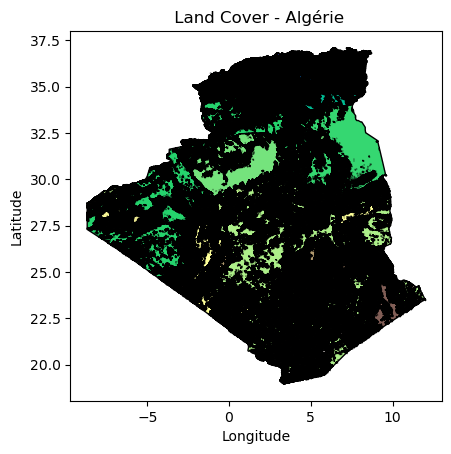

<Figure size 800x800 with 0 Axes>

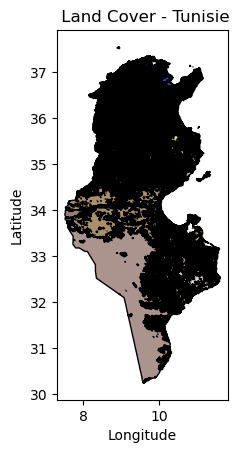

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os


landcover_dir = os.path.join(raw, "landcover")


shp_dz_path = os.path.join(landcover_dir, "Algeria", "dza_gc_adg.shp")
shp_tn_path = os.path.join(landcover_dir, "Tunisia", "tun_gc_adg.shp")


lc_dz = gpd.read_file(shp_dz_path)
lc_tn = gpd.read_file(shp_tn_path)


print("🇩🇿 ALGÉRIE :", lc_dz.shape, "colonnes :", list(lc_dz.columns))
print("🇹🇳 TUNISIE :", lc_tn.shape, "colonnes :", list(lc_tn.columns))


plt.figure(figsize=(8, 8))
lc_dz.plot(edgecolor='black', cmap='terrain')
plt.title(" Land Cover - Algérie")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


plt.figure(figsize=(8, 8))
lc_tn.plot(edgecolor='black', cmap='terrain')
plt.title(" Land Cover - Tunisie")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Lister et vérifier les fichiers du dossier Climate

In [9]:
import os


climate_dir = os.path.join(raw, "climate")

print(f" Contenu du dossier Climate : {climate_dir}\n")
for file in os.listdir(climate_dir):
    print("  -", file)


 Contenu du dossier Climate : ../data\raw\climate

  - wc2.1_cruts4.09_5m_prec_2020-01.tif
  - wc2.1_cruts4.09_5m_prec_2020-02.tif
  - wc2.1_cruts4.09_5m_prec_2020-03.tif
  - wc2.1_cruts4.09_5m_prec_2020-04.tif
  - wc2.1_cruts4.09_5m_prec_2020-05.tif
  - wc2.1_cruts4.09_5m_prec_2020-06.tif
  - wc2.1_cruts4.09_5m_prec_2020-07.tif
  - wc2.1_cruts4.09_5m_prec_2020-08.tif
  - wc2.1_cruts4.09_5m_prec_2020-09.tif
  - wc2.1_cruts4.09_5m_prec_2020-10.tif
  - wc2.1_cruts4.09_5m_prec_2020-11.tif
  - wc2.1_cruts4.09_5m_prec_2020-12.tif
  - wc2.1_cruts4.09_5m_prec_2021-01.tif
  - wc2.1_cruts4.09_5m_prec_2021-02.tif
  - wc2.1_cruts4.09_5m_prec_2021-03.tif
  - wc2.1_cruts4.09_5m_prec_2021-04.tif
  - wc2.1_cruts4.09_5m_prec_2021-05.tif
  - wc2.1_cruts4.09_5m_prec_2021-06.tif
  - wc2.1_cruts4.09_5m_prec_2021-07.tif
  - wc2.1_cruts4.09_5m_prec_2021-08.tif
  - wc2.1_cruts4.09_5m_prec_2021-09.tif
  - wc2.1_cruts4.09_5m_prec_2021-10.tif
  - wc2.1_cruts4.09_5m_prec_2021-11.tif
  - wc2.1_cruts4.09_5m_prec_2

Lecture et affichage d’un fichier raster (exemple : température minimale de janvier)

 Données lues avec succès :
 - Dimensions : 4320 x 2160
 - CRS : EPSG:4326
 - Résolution : (0.08333333333333333, 0.08333333333333333)
 - Valeurs valides : 2273994 pixels
 - Min/Max : 0.00 / 1039.40


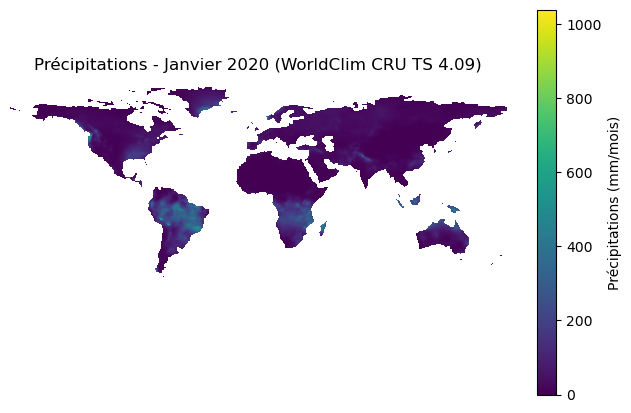

In [10]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os


climate_dir = r"../data/raw/climate"

# Exemple : précipitations janvier 2020
file_path = os.path.join(climate_dir, "wc2.1_cruts4.09_5m_prec_2020-01.tif")

# Lecture avec rasterio
with rasterio.open(file_path) as src:
    data = src.read(1, masked=True)  # masque les valeurs nodata
    profile = src.profile

 
    print(" Données lues avec succès :")
    print(f" - Dimensions : {src.width} x {src.height}")
    print(f" - CRS : {src.crs}")
    print(f" - Résolution : {src.res}")
    print(f" - Valeurs valides : {np.count_nonzero(~data.mask)} pixels")
    print(f" - Min/Max : {data.min():.2f} / {data.max():.2f}")

   
    plt.figure(figsize=(8, 5))
    plt.imshow(data, cmap='viridis')
    plt.colorbar(label="Précipitations (mm/mois)")
    plt.title("Précipitations - Janvier 2020 (WorldClim CRU TS 4.09)")
    plt.axis("off")
    plt.show()


Vérification rapide des 3 types de variables

 Température minimale (Janvier 2020)
 - Dimensions : 4320 x 2160
 - Nombre de bandes : 1
 - Type de données : ('float32',)
 - CRS : EPSG:4326
 - Résolution : (0.08333333333333333, 0.08333333333333333)
 - Étendue (bounds) : BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
 - Valeurs valides : 2273994 pixels
 - Min/Max : -47.00 / 29.00

 Température maximale (Janvier 2020)
 - Dimensions : 4320 x 2160
 - Nombre de bandes : 1
 - Type de données : ('float32',)
 - CRS : EPSG:4326
 - Résolution : (0.08333333333333333, 0.08333333333333333)
 - Étendue (bounds) : BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
 - Valeurs valides : 2273994 pixels
 - Min/Max : -40.75 / 42.75

 Précipitations (Janvier 2020)
 - Dimensions : 4320 x 2160
 - Nombre de bandes : 1
 - Type de données : ('float32',)
 - CRS : EPSG:4326
 - Résolution : (0.08333333333333333, 0.08333333333333333)
 - Étendue (bounds) : BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
 - Valeurs valides : 

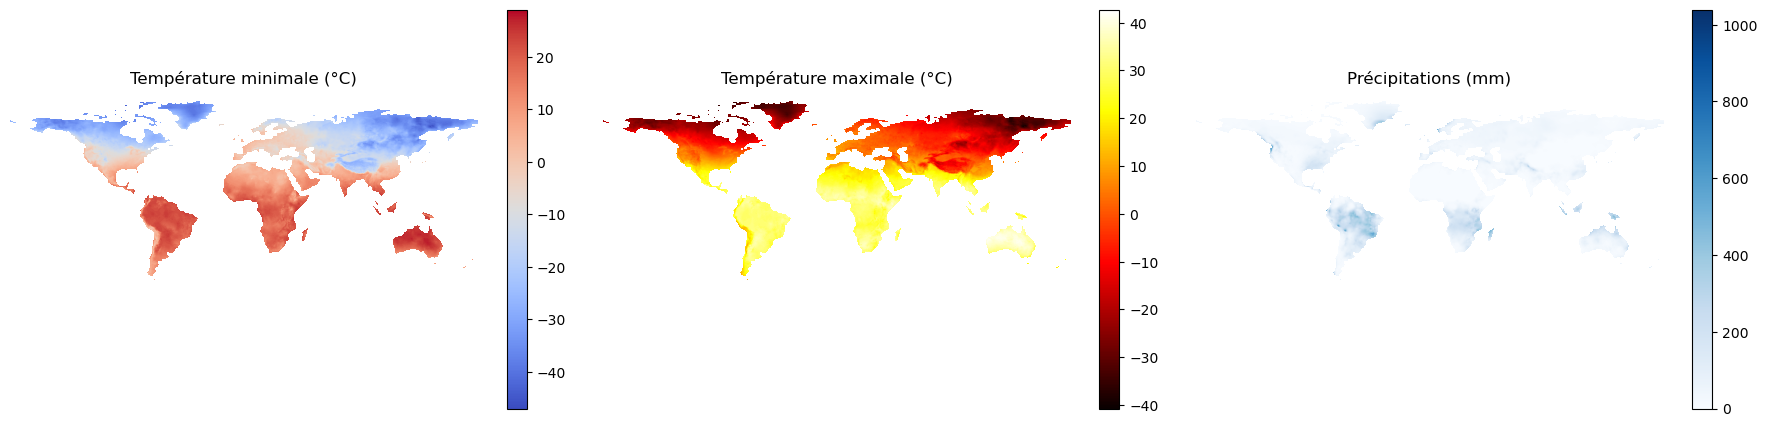

In [11]:
import rasterio
import os
import matplotlib.pyplot as plt
import numpy as np


climate_dir = r"C:\Users\DELL\Desktop\project_fire\data\raw\climate"

# Fichiers de Janvier 2020
tmin_jan_path = os.path.join(climate_dir, "wc2.1_cruts4.09_5m_tmin_2020-01.tif")
tmax_jan_path = os.path.join(climate_dir, "wc2.1_cruts4.09_5m_tmax_2020-01.tif")
prec_jan_path = os.path.join(climate_dir, "wc2.1_cruts4.09_5m_prec_2020-01.tif")


def show_raster_info(path, label):
    with rasterio.open(path) as src:
        data = src.read(1)
        valid_data = data[~np.isnan(data)]
        print(f" {label}")
        print(f" - Dimensions : {src.width} x {src.height}")
        print(f" - Nombre de bandes : {src.count}")
        print(f" - Type de données : {src.dtypes}")
        print(f" - CRS : {src.crs}")
        print(f" - Résolution : {src.res}")
        print(f" - Étendue (bounds) : {src.bounds}")
        print(f" - Valeurs valides : {len(valid_data)} pixels")
        print(f" - Min/Max : {valid_data.min():.2f} / {valid_data.max():.2f}\n")
        return data


tmin_data = show_raster_info(tmin_jan_path, "Température minimale (Janvier 2020)")
tmax_data = show_raster_info(tmax_jan_path, "Température maximale (Janvier 2020)")
prec_data = show_raster_info(prec_jan_path, "Précipitations (Janvier 2020)")

# --- Visualisation ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, data, title, cmap in zip(
    axes,
    [tmin_data, tmax_data, prec_data],
    ["Température minimale (°C)", "Température maximale (°C)", "Précipitations (mm)"],
    ["coolwarm", "hot", "Blues"]
):
    im = ax.imshow(data, cmap=cmap)
    ax.set_title(title)
    ax.axis("off")
    plt.colorbar(im, ax=ax, shrink=0.7)

plt.tight_layout()
plt.show()


In [12]:
import os

elev_folder = os.path.join(raw, "elevation")


print("Fichiers dans le dossier elevation :")
for f in os.listdir(elev_folder):
    print(f)


Fichiers dans le dossier elevation :
be15_grd
be15_grd.aux.xml
info


Dimensions échantillon : (336, 864)
Valeur min : -132
Valeur max : 6596
Moyenne : 179.64


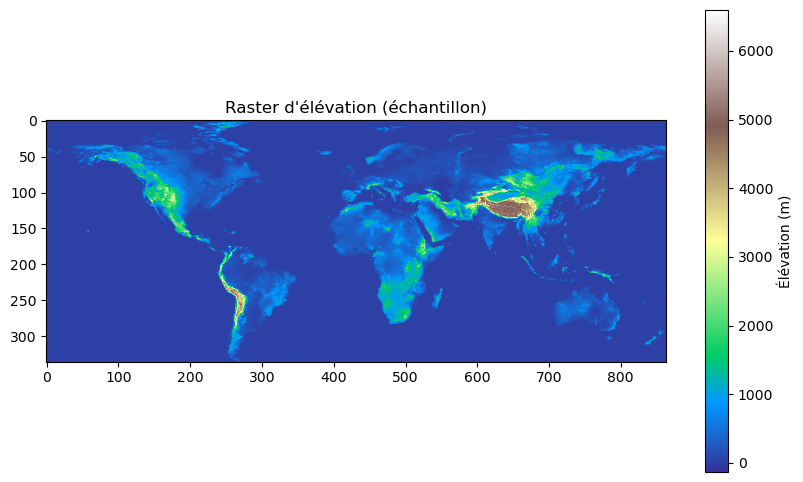

In [13]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

elev_file = os.path.join(raw, "elevation", "be15_grd")

with rasterio.open(elev_file) as src:
    # Lire un échantillon du raster pour économiser la mémoire
    scale = 100  # prendre 1 pixel sur 100
    elev_data_sample = src.read(
        1,
        out_shape=(src.height // scale, src.width // scale)
    )

    print(f"Dimensions échantillon : {elev_data_sample.shape}")
    print(f"Valeur min : {elev_data_sample.min()}")
    print(f"Valeur max : {elev_data_sample.max()}")
    print(f"Moyenne : {elev_data_sample.mean():.2f}")

   
    plt.figure(figsize=(10,6))
    plt.imshow(elev_data_sample, cmap='terrain')
    plt.colorbar(label='Élévation (m)')
    plt.title('Raster d\'élévation (échantillon)')
    plt.show()


In [14]:
import os

soil_folder = os.path.join(raw, "soil")

print("Contenu du dossier soil :")
for f in os.listdir(soil_folder):
    print(f)


Contenu du dossier soil :
HWSD2.bil
HWSD2.hdr
HWSD2.ldb
HWSD2.mdb
HWSD2.prj
HWSD2.stx
HWSD2_DB.zip


In [15]:
import pyodbc
import os

soil_mdb = os.path.join(raw, "soil", "HWSD2.mdb")

conn_str = (
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    rf'DBQ={soil_mdb};'
)

conn = pyodbc.connect(conn_str)
cursor = conn.cursor()

# Lister les tables
tables = cursor.tables()
for table in tables:
    if table.table_type == "TABLE":
        print(table.table_name)

conn.close()


D_ADD_PROP
D_AWC
D_COVERAGE
D_DRAINAGE
D_FAO90
D_IL
D_KOPPEN
D_PHASE
D_ROOT_DEPTH
D_ROOTS
D_SWR
D_TEXTURE
D_TEXTURE_SOTER
D_TEXTURE_USDA
D_WRB_PHASES
D_WRB2
D_WRB2code
D_WRB4
HWSD2_LAYERS
HWSD2_LAYERS_METADATA
HWSD2_SMU
HWSD2_SMU_METADATA
WRB_Class
WRB_Layer
WRB_Library


In [16]:
import pyodbc
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


soil_mdb = os.path.join(raw, "soil", "HWSD2.mdb")

conn_str = (
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    rf'DBQ={soil_mdb};'
)
conn = pyodbc.connect(conn_str)

# Lire la table HWSD2_LAYERS
df_layers = pd.read_sql("SELECT * FROM [HWSD2_LAYERS]", conn)
print("HWSD2_LAYERS :")
print(df_layers.head())

# Lire la table HWSD2_SMU
df_smu = pd.read_sql("SELECT * FROM [HWSD2_SMU]", conn)
print("HWSD2_SMU :")
print(df_smu.head())

conn.close()


HWSD2_LAYERS :
   ID  HWSD2_SMU_ID NSC_MU_SOURCE1 NSC_MU_SOURCE2 WISE30s_SMU_ID  \
0   1          1666           None           None     WD10001666   
1   2          6309           None           None     WD10006309   
2   3          1700           None           None     WD10001700   
3   4          6310           None           None     WD10006310   
4   5          6311           None           None     WD10006311   

   HWSD1_SMU_ID  COVERAGE  SEQUENCE  SHARE   NSC  ... CEC_SOIL CEC_CLAY  \
0          1666         4         1     70  None  ...        8       50   
1          6309         4         1     50  None  ...        8       50   
2          1700         4         1     60  None  ...        8       50   
3          6310         4         1     30  None  ...        8       50   
4          6311         4         1     50  None  ...        8       50   

  CEC_EFF  TEB  BSAT  ALUM_SAT  ESP  TCARBON_EQ  GYPSUM  ELEC_COND  
0     4.0  5.0    71         0    4         0.0     2.9 

 Dossier de sortie : ../data/raw\elevation_clipped
Élévation Algérie : (336, 864)
 Sauvegardé : ../data/raw\elevation_clipped\elevation_alg.tif
Élévation Tunisie : (336, 864)
 Sauvegardé : ../data/raw\elevation_clipped\elevation_tun.tif


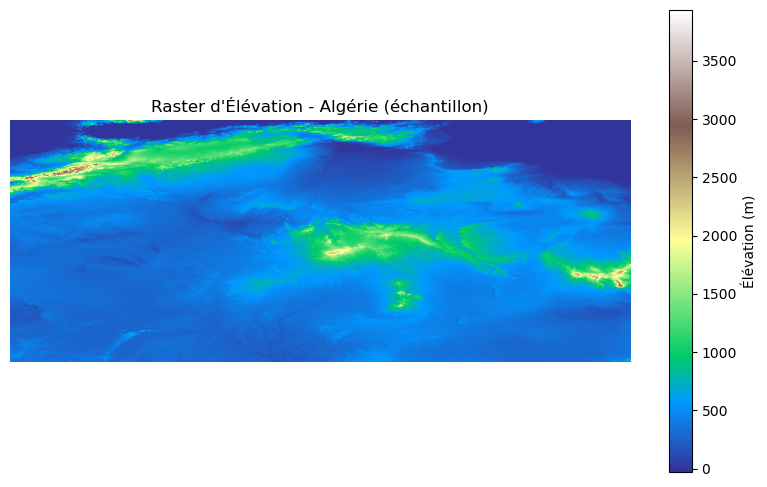

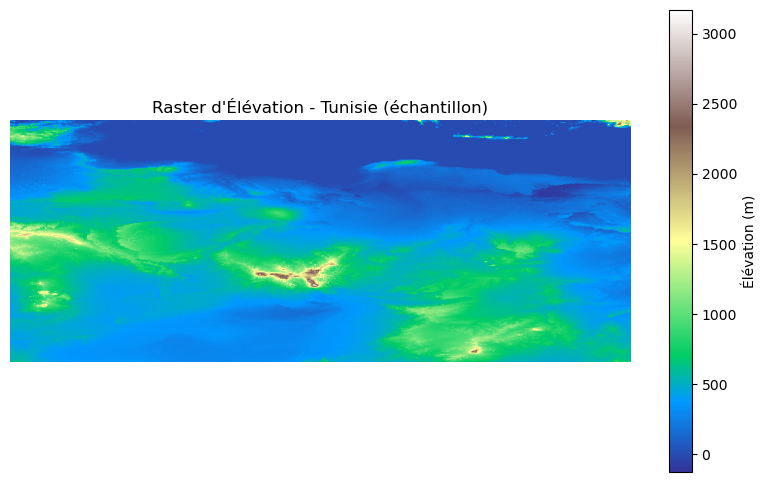

In [17]:
# -------------------------- IMPORT LIBRARIES --------------------------
import os
import rasterio
from rasterio.windows import from_bounds
from rasterio.plot import show
import matplotlib.pyplot as plt

# -------------------------- DEFINE PATHS --------------------------
raw = "../data/raw" 
elev_file = os.path.join(raw, "elevation", "be15_grd")  

# Dossier de sortie pour les rasters clipés
output_dir = os.path.join(raw, "elevation_clipped")
os.makedirs(output_dir, exist_ok=True)
print(" Dossier de sortie :", output_dir)

# -------------------------- DEFINE BOUNDING BOXES --------------------------
# Algérie : lon_min, lon_max, lat_min, lat_max
bbox_alg = (-8.7, 11.9, 19.0, 37.1)
# Tunisie : lon_min, lon_max, lat_min, lat_max
bbox_tun = (7.5, 11.9, 30.0, 37.0)

# -------------------------- FUNCTION TO CLIP RASTER --------------------------
def clip_raster(raster_path, bbox, scale=1):
    """Découpe un raster selon une bounding box et réduit la résolution pour économiser la mémoire."""
    if not os.path.exists(raster_path):
        raise FileNotFoundError(f"Le fichier raster n'existe pas : {raster_path}")

    with rasterio.open(raster_path) as src:
        window = from_bounds(*bbox, transform=src.transform)
        out_shape = (src.height // scale, src.width // scale)
        clipped = src.read(1, window=window, out_shape=out_shape)
        transform = src.window_transform(window)
        meta = src.meta.copy()

        return clipped, transform, meta

# -------------------------- FUNCTION TO SAVE RASTER --------------------------
def save_raster(clipped_array, transform, meta, output_path):
    """Sauvegarde un raster clipé sur disque."""
    meta.update({
        "height": clipped_array.shape[0],
        "width": clipped_array.shape[1],
        "transform": transform,
        "driver": "GTiff"
    })
    with rasterio.open(output_path, "w", **meta) as dest:
        dest.write(clipped_array, 1)
    print(f" Sauvegardé : {output_path}")

# -------------------------- CLIPPING & ECHANTILLONNAGE --------------------------
scale = 100  # 1 pixel sur 100 pour limiter mémoire

# Algérie
elev_alg, transform_alg, meta_alg = clip_raster(elev_file, bbox_alg, scale=scale)
print("Élévation Algérie :", elev_alg.shape)
save_raster(elev_alg, transform_alg, meta_alg, os.path.join(output_dir, "elevation_alg.tif"))

# Tunisie
elev_tun, transform_tun, meta_tun = clip_raster(elev_file, bbox_tun, scale=scale)
print("Élévation Tunisie :", elev_tun.shape)
save_raster(elev_tun, transform_tun, meta_tun, os.path.join(output_dir, "elevation_tun.tif"))

# -------------------------- VISUALISATION --------------------------
plt.figure(figsize=(10,6))
plt.imshow(elev_alg, cmap='terrain')
plt.colorbar(label='Élévation (m)')
plt.title("Raster d'Élévation - Algérie (échantillon)")
plt.axis('off')
plt.show()

plt.figure(figsize=(10,6))
plt.imshow(elev_tun, cmap='terrain')
plt.colorbar(label='Élévation (m)')
plt.title("Raster d'Élévation - Tunisie (échantillon)")
plt.axis('off')
plt.show()


In [18]:
import pyodbc
import pandas as pd

soil_mdb = "../data/raw/soil/HWSD2.mdb"

conn_str = (
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    rf'DBQ={soil_mdb};'
)
conn = pyodbc.connect(conn_str)

# Exemple : lire la table des SMU (soil mapping units)
df_smu = pd.read_sql("SELECT * FROM HWSD2_SMU", conn)
df_layers = pd.read_sql("SELECT * FROM HWSD2_LAYERS", conn)

conn.close()

print(df_smu.head())
print(df_layers.head())


    ID  HWSD2_SMU_ID WISE30s_SMU_ID  HWSD1_SMU_ID  COVERAGE  SHARE  WRB4  \
0  669         12707     WD10012707         12707         3     40  ALfr   
1  695         11825     WD30011825         11825         2    100  ALfr   
2  696         11823     WD30011823         11823         2    100  ALfr   
3  697         13458     WD30013458         13458         3    100  ALfr   
4  698         11824     WD30011824         11824         2    100  ALfr   

  WRB_PHASES WRB2  WRB2_CODE  ... REF_BULK_DENSITY BULK_DENSITY  DRAINAGE  \
0       ALfr   AL          2  ...             1.63         1.35        MW   
1       ALfr   AL          2  ...             1.76         1.44        MW   
2       ALfr   AL          2  ...             1.76         1.44        MW   
3       ALfr   AL          2  ...             1.76         1.44        MW   
4       ALfr   AL          2  ...             1.76         1.44        MW   

   ROOT_DEPTH  AWC PHASE1  PHASE2  ROOTS  IL  ADD_PROP  
0           1  168    N

In [19]:
import pyodbc

soil_mdb = r"../data/raw/soil/HWSD2.mdb"
conn_str = (
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    rf'DBQ={soil_mdb};'
)
conn = pyodbc.connect(conn_str)
cursor = conn.cursor()

# Lister les colonnes de HWSD2_LAYERS
cursor.execute("SELECT * FROM HWSD2_LAYERS")
cols = [column[0] for column in cursor.description]
print(cols)

conn.close()


['ID', 'HWSD2_SMU_ID', 'NSC_MU_SOURCE1', 'NSC_MU_SOURCE2', 'WISE30s_SMU_ID', 'HWSD1_SMU_ID', 'COVERAGE', 'SEQUENCE', 'SHARE', 'NSC', 'WRB_PHASES', 'WRB4', 'WRB2', 'FAO90', 'ROOT_DEPTH', 'PHASE1', 'PHASE2', 'ROOTS', 'IL', 'SWR', 'DRAINAGE', 'AWC', 'ADD_PROP', 'LAYER', 'TOPDEP', 'BOTDEP', 'COARSE', 'SAND', 'SILT', 'CLAY', 'TEXTURE_USDA', 'TEXTURE_SOTER', 'BULK', 'REF_BULK', 'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND']


In [20]:
import pyodbc
import pandas as pd

# 🔹 Chemin vers la base MDB
soil_mdb = r"../data/raw/soil/HWSD2.mdb"

# 🔹 Connexion à la base Access
conn_str = (
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    rf'DBQ={soil_mdb};'
)
conn = pyodbc.connect(conn_str)

# 🔹 Lecture uniquement des couches D1
query = """
SELECT *
FROM HWSD2_LAYERS
WHERE LAYER = 'D1'
"""
soil_d1 = pd.read_sql(query, conn)

conn.close()

print(" Données filtrées sur la couche D1")
print("Nombre de lignes :", soil_d1.shape[0])
print("Colonnes disponibles :", list(soil_d1.columns))

# 🔹 Aperçu des premières lignes
display(soil_d1.head())


 Données filtrées sur la couche D1
Nombre de lignes : 58405
Colonnes disponibles : ['ID', 'HWSD2_SMU_ID', 'NSC_MU_SOURCE1', 'NSC_MU_SOURCE2', 'WISE30s_SMU_ID', 'HWSD1_SMU_ID', 'COVERAGE', 'SEQUENCE', 'SHARE', 'NSC', 'WRB_PHASES', 'WRB4', 'WRB2', 'FAO90', 'ROOT_DEPTH', 'PHASE1', 'PHASE2', 'ROOTS', 'IL', 'SWR', 'DRAINAGE', 'AWC', 'ADD_PROP', 'LAYER', 'TOPDEP', 'BOTDEP', 'COARSE', 'SAND', 'SILT', 'CLAY', 'TEXTURE_USDA', 'TEXTURE_SOTER', 'BULK', 'REF_BULK', 'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND']


,ID,HWSD2_SMU_ID,NSC_MU_SOURCE1,NSC_MU_SOURCE2,WISE30s_SMU_ID,HWSD1_SMU_ID,COVERAGE,SEQUENCE,SHARE,NSC,...,CEC_SOIL,CEC_CLAY,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND
0,667,12704,None,None,WD10012704,12704,3,3,20,None,...,8,46,6.0,5.0,59,0,2,0.0,0.1,1
1,668,12705,None,None,WD10012705,12705,3,4,20,None,...,8,46,6.0,5.0,59,0,2,0.0,0.1,1
2,669,12707,None,None,WD10012707,12707,3,1,40,None,...,8,46,6.0,5.0,59,0,2,0.0,0.1,1
3,670,12708,None,None,WD10012708,12708,3,3,20,None,...,8,46,6.0,5.0,59,0,2,0.0,0.1,1
4,695,11825,None,None,WD30011825,11825,2,1,100,None,...,9,20,6.0,4.0,41,50,2,0.0,0.1,0


In [21]:

cols_to_keep = [
    "LAYER",
    "COARSE", "SAND", "SILT", "CLAY",
    "TEXTURE_USDA", "TEXTURE_SOTER",
    "BULK", "REF_BULK", "ORG_CARBON", "PH_WATER",
    "TOTAL_N", "CN_RATIO", "CEC_SOIL", "CEC_CLAY", "CEC_EFF",
    "TEB", "BSAT", "ALUM_SAT", "ESP", "TCARBON_EQ", "GYPSUM", "ELEC_COND"
]

# Création du sous-ensemble
soil_d1_selected = soil_d1[cols_to_keep]

print(" Sous-ensemble des colonnes sélectionnées :")
print(soil_d1_selected.shape)
display(soil_d1_selected.head())


 Sous-ensemble des colonnes sélectionnées :
(58405, 23)


,LAYER,COARSE,SAND,SILT,CLAY,TEXTURE_USDA,TEXTURE_SOTER,BULK,REF_BULK,ORG_CARBON,...,CEC_SOIL,CEC_CLAY,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND
0,D1,5,67,18,15,11.0,C,1.35,1.63,1.062,...,8,46,6.0,5.0,59,0,2,0.0,0.1,1
1,D1,5,67,18,15,11.0,C,1.35,1.63,1.062,...,8,46,6.0,5.0,59,0,2,0.0,0.1,1
2,D1,5,67,18,15,11.0,C,1.35,1.63,1.062,...,8,46,6.0,5.0,59,0,2,0.0,0.1,1
3,D1,5,67,18,15,11.0,C,1.35,1.63,1.062,...,8,46,6.0,5.0,59,0,2,0.0,0.1,1
4,D1,2,24,52,24,7.0,M,1.44,1.76,1.475,...,9,20,6.0,4.0,41,50,2,0.0,0.1,0


In [22]:
import os
import pyodbc
import pandas as pd

# ------------------  Charger les données Soil depuis HWSD2.mdb ------------------
soil_mdb = r"../data/raw/soil/HWSD2.mdb"

conn_str = (
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    rf'DBQ={soil_mdb};'
)
conn = pyodbc.connect(conn_str)

query = """
SELECT *
FROM HWSD2_LAYERS
WHERE LAYER = 'D1'
"""
soil_d1 = pd.read_sql(query, conn)
conn.close()

print(" Données filtrées sur la couche D1")
print("Nombre de lignes :", soil_d1.shape[0])
print("Colonnes disponibles :", list(soil_d1.columns))

# ------------------  Sélection des colonnes importantes ------------------
cols_to_keep = [
    "LAYER",
    "COARSE", "SAND", "SILT", "CLAY",
    "TEXTURE_USDA", "TEXTURE_SOTER",
    "BULK", "REF_BULK", "ORG_CARBON", "PH_WATER",
    "TOTAL_N", "CN_RATIO", "CEC_SOIL", "CEC_CLAY", "CEC_EFF",
    "TEB", "BSAT", "ALUM_SAT", "ESP", "TCARBON_EQ", "GYPSUM", "ELEC_COND"
]

soil_d1_selected = soil_d1[cols_to_keep]
print(" Sous-ensemble créé :", soil_d1_selected.shape)


soil_clipped_dir = "../data/raw/soil_clipped"
os.makedirs(soil_clipped_dir, exist_ok=True)

soil_d1_file = os.path.join(soil_clipped_dir, "soil_d1_selected.csv")
soil_d1_selected.to_csv(soil_d1_file, index=False)

print(f"💾 Données Soil D1 sauvegardées avec succès : {soil_d1_file}")


 Données filtrées sur la couche D1
Nombre de lignes : 58405
Colonnes disponibles : ['ID', 'HWSD2_SMU_ID', 'NSC_MU_SOURCE1', 'NSC_MU_SOURCE2', 'WISE30s_SMU_ID', 'HWSD1_SMU_ID', 'COVERAGE', 'SEQUENCE', 'SHARE', 'NSC', 'WRB_PHASES', 'WRB4', 'WRB2', 'FAO90', 'ROOT_DEPTH', 'PHASE1', 'PHASE2', 'ROOTS', 'IL', 'SWR', 'DRAINAGE', 'AWC', 'ADD_PROP', 'LAYER', 'TOPDEP', 'BOTDEP', 'COARSE', 'SAND', 'SILT', 'CLAY', 'TEXTURE_USDA', 'TEXTURE_SOTER', 'BULK', 'REF_BULK', 'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND']
 Sous-ensemble créé : (58405, 23)
💾 Données Soil D1 sauvegardées avec succès : ../data/raw/soil_clipped\soil_d1_selected.csv


In [23]:
import pyodbc
import pandas as pd

# 🔹 Chemin vers la base MDB
soil_mdb = r"../data/raw/soil/HWSD2.mdb"

# 🔹 Connexion à la base Access
conn_str = (
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    rf'DBQ={soil_mdb};'
)
conn = pyodbc.connect(conn_str)

# 🔹 Vérifier quelles colonnes existent dans HWSD2_SMU
df_smu = pd.read_sql("SELECT TOP 10 * FROM HWSD2_SMU", conn)
print("Colonnes de HWSD2_SMU :", df_smu.columns)
display(df_smu.head())


Colonnes de HWSD2_SMU : Index(['ID', 'HWSD2_SMU_ID', 'WISE30s_SMU_ID', 'HWSD1_SMU_ID', 'COVERAGE',
       'SHARE', 'WRB4', 'WRB_PHASES', 'WRB2', 'WRB2_CODE', 'FAO90', 'KOPPEN',
       'TEXTURE_USDA', 'REF_BULK_DENSITY', 'BULK_DENSITY', 'DRAINAGE',
       'ROOT_DEPTH', 'AWC', 'PHASE1', 'PHASE2', 'ROOTS', 'IL', 'ADD_PROP'],
      dtype='object')


,ID,HWSD2_SMU_ID,WISE30s_SMU_ID,HWSD1_SMU_ID,COVERAGE,SHARE,WRB4,WRB_PHASES,WRB2,WRB2_CODE,...,REF_BULK_DENSITY,BULK_DENSITY,DRAINAGE,ROOT_DEPTH,AWC,PHASE1,PHASE2,ROOTS,IL,ADD_PROP
0,669,12707,WD10012707,12707,3,40,ALfr,ALfr,AL,2,...,1.63,1.35,MW,1,168,None,None,None,None,0
1,695,11825,WD30011825,11825,2,100,ALfr,ALfr,AL,2,...,1.76,1.44,MW,1,152,None,None,None,None,0
2,696,11823,WD30011823,11823,2,100,ALfr,ALfr,AL,2,...,1.76,1.44,MW,1,152,None,None,None,None,0
3,697,13458,WD30013458,13458,3,100,ALfr,ALfr,AL,2,...,1.76,1.44,MW,1,152,None,None,None,None,0
4,698,11824,WD30011824,11824,2,100,ALfr,ALfr,AL,2,...,1.76,1.44,MW,1,152,None,None,None,None,0


In [24]:
import geopandas as gpd
import pandas as pd
import pyodbc
import os

# Chemins
base_path = "../data/raw"
landcover_dir = os.path.join(base_path, "landcover")
soil_mdb = os.path.join(base_path, "soil", "HWSD2.mdb")

# Charger les shapefiles des pays
dz = gpd.read_file(os.path.join(landcover_dir, "Algeria", "dza_gc_adg.shp"))
tn = gpd.read_file(os.path.join(landcover_dir, "Tunisia", "tun_gc_adg.shp"))

print(" Shapefiles chargés :")
print("Algérie :", dz.shape)
print("Tunisie :", tn.shape)


 Shapefiles chargés :
Algérie : (386454, 5)
Tunisie : (52059, 5)


In [25]:
import pyodbc
import pandas as pd

soil_mdb = r"../data/raw/soil/HWSD2.mdb"

conn_str = (
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    rf'DBQ={soil_mdb};'
)
conn = pyodbc.connect(conn_str)

# 🔍 Lire quelques lignes pour inspecter la table
df_preview = pd.read_sql("SELECT TOP 5 * FROM HWSD2_SMU", conn)
conn.close()

print("✅ Colonnes disponibles dans HWSD2_SMU :")
print(df_preview.columns.tolist())
display(df_preview.head())


✅ Colonnes disponibles dans HWSD2_SMU :
['ID', 'HWSD2_SMU_ID', 'WISE30s_SMU_ID', 'HWSD1_SMU_ID', 'COVERAGE', 'SHARE', 'WRB4', 'WRB_PHASES', 'WRB2', 'WRB2_CODE', 'FAO90', 'KOPPEN', 'TEXTURE_USDA', 'REF_BULK_DENSITY', 'BULK_DENSITY', 'DRAINAGE', 'ROOT_DEPTH', 'AWC', 'PHASE1', 'PHASE2', 'ROOTS', 'IL', 'ADD_PROP']


,ID,HWSD2_SMU_ID,WISE30s_SMU_ID,HWSD1_SMU_ID,COVERAGE,SHARE,WRB4,WRB_PHASES,WRB2,WRB2_CODE,...,REF_BULK_DENSITY,BULK_DENSITY,DRAINAGE,ROOT_DEPTH,AWC,PHASE1,PHASE2,ROOTS,IL,ADD_PROP
0,669,12707,WD10012707,12707,3,40,ALfr,ALfr,AL,2,...,1.63,1.35,MW,1,168,None,None,None,None,0
1,695,11825,WD30011825,11825,2,100,ALfr,ALfr,AL,2,...,1.76,1.44,MW,1,152,None,None,None,None,0
2,696,11823,WD30011823,11823,2,100,ALfr,ALfr,AL,2,...,1.76,1.44,MW,1,152,None,None,None,None,0
3,697,13458,WD30013458,13458,3,100,ALfr,ALfr,AL,2,...,1.76,1.44,MW,1,152,None,None,None,None,0
4,698,11824,WD30011824,11824,2,100,ALfr,ALfr,AL,2,...,1.76,1.44,MW,1,152,None,None,None,None,0


In [26]:
print("CRS Algérie :", lc_dz.crs)
print("CRS Tunisie :", lc_tn.crs)


CRS Algérie : EPSG:4326
CRS Tunisie : EPSG:4326


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


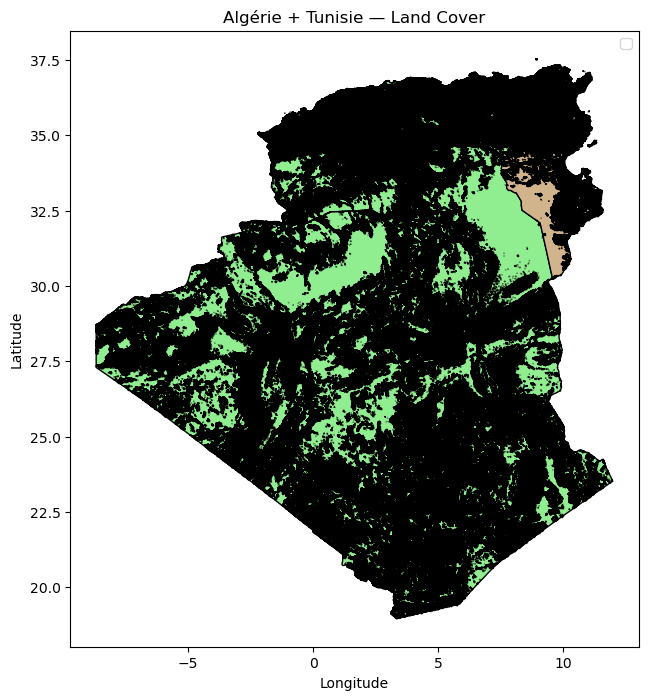

In [27]:
fig, ax = plt.subplots(figsize=(10, 8))
lc_dz.plot(ax=ax, color='lightgreen', edgecolor='black', label='Algérie')
lc_tn.plot(ax=ax, color='tan', edgecolor='black', label='Tunisie')
plt.legend()
plt.title("Algérie + Tunisie — Land Cover")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [28]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import json
import os

# --- Chemins ---
raster_path = "../data/raw/soil/HWSD2/HWSD2.bil"
dz_shp = "../data/raw/landcover/Algeria/dza_gc_adg.shp"
tn_shp = "../data/raw/landcover/Tunisia/tun_gc_adg.shp"

# --- Lecture du raster ---
src = rasterio.open(raster_path)

# --- Clipping pour l'Algérie ---
dz = gpd.read_file(dz_shp).to_crs(src.crs)
geo_dz = [json.loads(dz.to_json())["features"][0]["geometry"]]
out_image_dz, out_transform_dz = mask(src, geo_dz, crop=True)
out_meta_dz = src.meta.copy()
out_meta_dz.update({
    "driver": "GTiff",
    "height": out_image_dz.shape[1],
    "width": out_image_dz.shape[2],
    "transform": out_transform_dz
})
os.makedirs("../data/raw/soil_clipped", exist_ok=True)
with rasterio.open("../data/raw/soil_clipped/HWSD2_Algeria_clip.tif", "w", **out_meta_dz) as dest:
    dest.write(out_image_dz)
print(" Raster Algérie découpé sauvegardé.")

# --- Clipping pour la Tunisie ---
tn = gpd.read_file(tn_shp).to_crs(src.crs)
geo_tn = [json.loads(tn.to_json())["features"][0]["geometry"]]
out_image_tn, out_transform_tn = mask(src, geo_tn, crop=True)
out_meta_tn = src.meta.copy()
out_meta_tn.update({
    "driver": "GTiff",
    "height": out_image_tn.shape[1],
    "width": out_image_tn.shape[2],
    "transform": out_transform_tn
})
with rasterio.open("../data/raw/soil_clipped/HWSD2_Tunisia_clip.tif", "w", **out_meta_tn) as dest:
    dest.write(out_image_tn)
print(" Raster Tunisie découpé sauvegardé.")


RasterioIOError: ../data/raw/soil/HWSD2/HWSD2.bil: No such file or directory

In [ ]:
import os
import json
import rasterio
import numpy as np
import geopandas as gpd
import pandas as pd
from rasterio.mask import mask

# ---  Chemins des fichiers ---
raster_path = "../data/raw/soil/HWSD2/HWSD2.bil"
dz_shp = "../data/raw/landcover/Algeria/dza_gc_adg.shp"
tn_shp = "../data/raw/landcover/Tunisia/tun_gc_adg.shp"
soil_table_path = "../data/raw/soil_clipped/soil_d1_selected.csv"

# --- Charger la table des propriétés de sol ---
soil_d1 = pd.read_csv(soil_table_path)
print(" Table HWSD2_LAYERS (D1) chargée :", soil_d1.shape)

# --- Fonction de clipping + extraction des SMU ---
def extract_smu_from_country(shp_path, name):
    with rasterio.open(raster_path) as src:
        country = gpd.read_file(shp_path).to_crs(src.crs)
        geom = [json.loads(country.to_json())["features"][0]["geometry"]]
        out_image, _ = mask(src, geom, crop=True)
        smu_codes = np.unique(out_image[out_image > 0])  # garder les codes valides (>0)
        print(f" {name} — {len(smu_codes)} codes SMU extraits.")
        return smu_codes

# --- Extraction des SMU pour chaque pays ---
smu_dz = extract_smu_from_country(dz_shp, "Algérie")
smu_tn = extract_smu_from_country(tn_shp, "Tunisie")

# --- Fusion des codes ---
smu_all = np.unique(np.concatenate([smu_dz, smu_tn]))
print(" Total de SMU pour Algérie + Tunisie :", len(smu_all))

# --- Charger la table SMU (pour correspondance entre SMU et propriétés) ---
import pyodbc
soil_mdb = r"../data/raw/soil/HWSD2/HWSD2.mdb"
conn_str = r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=' + soil_mdb
conn = pyodbc.connect(conn_str)
df_smu = pd.read_sql("SELECT * FROM HWSD2_SMU", conn)
conn.close()

print(" Table HWSD2_SMU chargée :", df_smu.shape)

# --- Filtrer uniquement les SMU présents en Algérie & Tunisie ---
df_smu_filtered = df_smu[df_smu["HWSD2_SMU_ID"].isin(smu_all)]
print(" SMU filtrés (Algérie + Tunisie) :", df_smu_filtered.shape)

# --- Jointure avec les propriétés de sol D1 ---
soil_final = df_smu_filtered.merge(soil_d1, how="left", left_on="HWSD2_SMU_ID", right_index=False)
print(" Jointure finale réussie :", soil_final.shape)

# --- Sauvegarde ---
output_path = "../data/raw/soil_clipped/soil_DZ_TN_D1.csv"
soil_final.to_csv(output_path, index=False)
print(f" Données de sol (Algérie + Tunisie) sauvegardées : {output_path}")


In [ ]:
import matplotlib.pyplot as plt

plt.hist(soil_final["PH_WATER"].dropna(), bins=30, color='tan')
plt.title("Distribution du pH du sol (Algérie + Tunisie)")
plt.xlabel("pH (eau)")
plt.ylabel("Fréquence")
plt.show()


In [ ]:
import rasterio
from rasterio.mask import mask
import os
import glob





climate_dir = os.path.join(raw, "climate")
output_dir = os.path.join(raw, "climate_clipped")
os.makedirs(output_dir, exist_ok=True)

# --- Fonction de clipping ---
def clip_raster(raster_path, gdf, output_path):
    with rasterio.open(raster_path) as src:
        out_image, out_transform = mask(src, gdf.geometry, crop=True)
        out_meta = src.meta.copy()
        out_meta.update({
            "driver": "GTiff",
            "height": out_image.shape[1],
            "width": out_image.shape[2],
            "transform": out_transform
        })
        with rasterio.open(output_path, "w", **out_meta) as dest:
            dest.write(out_image)
    print(f" Clipped: {os.path.basename(output_path)}")

# --- Lister tous les fichiers .tif dans climate_dir ---
tif_files = glob.glob(os.path.join(climate_dir, "*.tif"))
print(f"Nombre de fichiers trouvés: {len(tif_files)}")


for raster_path in tif_files:
    file = os.path.basename(raster_path)
    try:
       
        out_dz = os.path.join(output_dir, file.replace(".tif", "_DZ.tif"))
        clip_raster(raster_path, lc_dz, out_dz)

       
        out_tn = os.path.join(output_dir, file.replace(".tif", "_TN.tif"))
        clip_raster(raster_path, lc_tn, out_tn)
    except Exception as e:
        print(f" Erreur sur {file}: {e}")
